<!--
---
title: Pandas (Cheat Sheet)
description: A cheat sheet of pandas (A fast, powerful, and flexible data analysis/manipulation library for Python). Specifically made for data science interviews
-->

# Pandas

<a href="https://colab.research.google.com/github/singhsidhukuldeep/singhsidhukuldeep.github.io/blob/master/docs/Cheat-Sheets/Pandas.ipynb" target="_blank"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"></a>

<!-- [TOC] -->

Pandas is a fast, flexible, and expressive open-source data analysis/manipulation library built on top of NumPy in Python. It provides data structures like Series (1D) and DataFrame (2D) for handling tabular data, time series, and more. Essential for data cleaning, transformation, and exploration.

- Official Website: https://pandas.pydata.org/
- Installation:  (https://pandas.pydata.org/docs/getting_started/install.html)
    ```shell
    pip install pandas
    ```
- Documentation: https://pandas.pydata.org/docs/
- GitHub: https://pandas.pydata.org/docs/

In [1]:
# Import Pandas
import pandas as pd
pd.__version__ 

# only used in this cheat sheet to display the DataFrames
# from IPython.display import display 

'2.2.3'

## Pandas Data Structures

### Series
- A one-dimensional labeled array capable of holding any data type.
- Created by passing a list or array of data, optionally with an index.

In [2]:
# Create a Series from a list
s = pd.Series([10, 20, 30, 40], index=['a', 'b', 'c', 'd'])
print("Series s:")
display(s)

# Create a Series from a dictionary
data_dict = {'x': 100, 'y': 200, 'z': 300}
s_dict = pd.Series(data_dict)
print("\nSeries s_dict:")
display(s_dict)

# Accessing elements
print("\nAccess element by label s['b']:", s['b'])
print("Access element by position s.iloc[2]:", s.iloc[2])

Series s:


a    10
b    20
c    30
d    40
dtype: int64


Series s_dict:


x    100
y    200
z    300
dtype: int64


Access element by label s['b']: 20
Access element by position s.iloc[2]: 30


### DataFrame
- A two-dimensional labeled data structure with columns of potentially different types.
- You can think of it like a table (similar to a spreadsheet or SQL table). You can create a DataFrame from dictionaries, lists, NumPy arrays, and more.

In [3]:
# Create DataFrame from a dictionary of lists
df = pd.DataFrame({
    'Name': ['Alice', 'Bob', 'Charlie'],
    'Age': [25, 30, 35],
    'City': ['New York', 'Paris', 'London']
})
print("DataFrame df:")
display(df)

# Create DataFrame from a list of lists
df2 = pd.DataFrame(
    [[1, 2, 3],
     [4, 5, 6],
     [7, 8, 9]],
    columns=['ColA', 'ColB', 'ColC']
)
print("\nDataFrame df2:")
display(df2)

# Check basic attributes
print("\nShape of df2:", df2.shape)
print("Columns of df2:", df2.columns)
print("Index of df2:", df2.index)


DataFrame df:


,Name,Age,City
0,Alice,25,New York
1,Bob,30,Paris
2,Charlie,35,London



DataFrame df2:


,ColA,ColB,ColC
0,1,2,3
1,4,5,6
2,7,8,9



Shape of df2: (3, 3)
Columns of df2: Index(['ColA', 'ColB', 'ColC'], dtype='object')
Index of df2: RangeIndex(start=0, stop=3, step=1)


### MultiIndex

A **MultiIndex** (hierarchical index) allows you to store and work with higher-dimensional data in a 2D table by using multiple index levels on rows (and/or columns).

In [4]:
import numpy as np

# Create a MultiIndex from tuples
tuples = [('Group1', 'Row1'), ('Group1', 'Row2'),
          ('Group2', 'Row1'), ('Group2', 'Row2')]
multi_index = pd.MultiIndex.from_tuples(tuples, names=['Group', 'Row'])

# Create a DataFrame using the MultiIndex
df_multi = pd.DataFrame(
    np.random.randn(4, 2),
    index=multi_index,
    columns=['ColX', 'ColY']
)
print("MultiIndex DataFrame:\n")
display(df_multi)
print("\nIndex levels:", df_multi.index.levels)


MultiIndex DataFrame:



ColX      ColY
Group  Row                     
Group1 Row1 -0.587480 -0.817371
       Row2 -1.394396 -1.291968
Group2 Row1  1.178137  0.866652
       Row2  0.920178  0.593349


Index levels: [['Group1', 'Group2'], ['Row1', 'Row2']]


## Selection & Indexing

You can select data in a `DataFrame` or `Series` in multiple ways: by label, by position, or by boolean masking.


In [5]:
# Using the df we created above
print("Original df:")
display(df)

# Select a single column by label
print("\nSingle column df['Name']:")
display(df['Name'])

# Using .loc (label-based)
print("\nUsing df.loc[0, 'Age']:")
display(df.loc[0, 'Age'])
print("\nUsing df.loc[0:1, ['Name', 'City']]:")
display(df.loc[0:1, ['Name', 'City']])

# Using .iloc (integer position-based)
print("\nUsing df.iloc[1, 2]:")  # second row, third column
display(df.iloc[1, 2])
print("\nUsing df.iloc[0:2, 0:2]:")
display(df.iloc[0:2, 0:2])

# Boolean indexing
print("\nRows where Age > 25:")
display(df[df['Age'] > 25])

Original df:


,Name,Age,City
0,Alice,25,New York
1,Bob,30,Paris
2,Charlie,35,London



Single column df['Name']:


0      Alice
1        Bob
2    Charlie
Name: Name, dtype: object


Using df.loc[0, 'Age']:


np.int64(25)


Using df.loc[0:1, ['Name', 'City']]:


,Name,City
0,Alice,New York
1,Bob,Paris



Using df.iloc[1, 2]:


'Paris'


Using df.iloc[0:2, 0:2]:


,Name,Age
0,Alice,25
1,Bob,30



Rows where Age > 25:


,Name,Age,City
1,Bob,30,Paris
2,Charlie,35,London


## Reshaping & Tidy Data

Common operations to reshape a DataFrame include `melt` (going from wide to long format), `pivot` (long to wide), and `concat`. "Tidy" data means each variable has its own column, each observation its own row.


In [6]:
# Example DataFrame
df_wide = pd.DataFrame({
    'id': [1, 2, 3],
    'varA': [10, 20, 30],
    'varB': [40, 50, 60]
})
print("Wide DataFrame:")
display(df_wide)

# Melt (wide -> long)
df_long = pd.melt(df_wide, id_vars='id', var_name='variable', value_name='value')
print("\nMelted (long) DataFrame:")
display(df_long)

# Pivot (long -> wide)
df_pivoted = df_long.pivot(index='id', columns='variable', values='value')
print("\nPivoted (wide) DataFrame:")
display(df_pivoted)

# Concat examples
df_part1 = pd.DataFrame({'A': [1, 2], 'B': [3, 4]})
df_part2 = pd.DataFrame({'A': [5, 6], 'B': [7, 8]})
df_concat = pd.concat([df_part1, df_part2], ignore_index=True)
print("\nConcatenated DataFrame:")
display(df_concat)

Wide DataFrame:


,id,varA,varB
0,1,10,40
1,2,20,50
2,3,30,60



Melted (long) DataFrame:


,id,variable,value
0,1,varA,10
1,2,varA,20
2,3,varA,30
3,1,varB,40
4,2,varB,50
5,3,varB,60



Pivoted (wide) DataFrame:


variable,varA,varB
id,,
1,10,40
2,20,50
3,30,60



Concatenated DataFrame:


,A,B
0,1,3
1,2,4
2,5,7
3,6,8


## Subsetting Data

Subsetting data means taking rows or columns that meet certain criteria. You can slice by row/column positions, select columns by name, or filter by conditions.


In [7]:
# Using df_wide again
print("df_wide:")
display(df_wide)

# Subset columns
subset_columns = df_wide[['id', 'varA']]
print("\nSubset of columns [id, varA]:")
display(subset_columns)

# Subset rows by index slicing
subset_rows = df_wide.iloc[0:2]  # first two rows
print("\nSubset of rows (first two rows):")
display(subset_rows)

# Subset using a condition
condition_subset = df_wide[df_wide['varA'] > 10]
print("\nSubset where varA > 10:")
display(condition_subset)

df_wide:


,id,varA,varB
0,1,10,40
1,2,20,50
2,3,30,60



Subset of columns [id, varA]:


,id,varA
0,1,10
1,2,20
2,3,30



Subset of rows (first two rows):


,id,varA,varB
0,1,10,40
1,2,20,50



Subset where varA > 10:


,id,varA,varB
1,2,20,50
2,3,30,60


## Summarizing & Descriptive Statistics

Pandas provides convenient methods to get summary statistics: `mean()`, `count()`, `describe()`, etc.


In [8]:
import numpy as np

df_stats = pd.DataFrame({
    'Col1': np.random.randint(0, 100, 5),
    'Col2': np.random.randint(0, 100, 5),
    'Col3': np.random.randint(0, 100, 5),
    'Category': ['A', 'B', 'A', 'C', 'B'],
    'Status': ['Active', 'Inactive', 'Active', 'Active', 'Inactive']
})
print("DataFrame with mixed types:")
display(df_stats)

# Basic stats (numeric columns only)
print("\nNumerical Statistics (describe):")
display(df_stats.describe())

# Basic stats for object columns
print("\nCategorical Statistics (describe):")
display(df_stats.describe(include=['object']))

# Value counts for categorical columns
print("\nCategory value counts:")
display(df_stats['Category'].value_counts())
print("\nStatus value counts:")
display(df_stats['Status'].value_counts())

# Mean of numeric columns
print("\nMean of numeric columns:")
display(df_stats.mean(numeric_only=True))

# Count of all columns (works for both numeric and object types)
print("\nCount of all columns:")
display(df_stats.count())

DataFrame with mixed types:


,Col1,Col2,Col3,Category,Status
0,74,65,92,A,Active
1,96,70,76,B,Inactive
2,63,68,83,A,Active
3,35,85,75,C,Active
4,56,11,42,B,Inactive



Numerical Statistics (describe):


,Col1,Col2,Col3
count,5.000000,5.000000,5.000000
mean,64.800000,59.800000,73.600000
std,22.509998,28.349603,18.928814
min,35.000000,11.000000,42.000000
25%,56.000000,65.000000,75.000000
50%,63.000000,68.000000,76.000000
75%,74.000000,70.000000,83.000000
max,96.000000,85.000000,92.000000



Categorical Statistics (describe):


,Category,Status
count,5,5
unique,3,2
top,A,Active
freq,2,3



Category value counts:


Category
A    2
B    2
C    1
Name: count, dtype: int64


Status value counts:


Status
Active      3
Inactive    2
Name: count, dtype: int64


Mean of numeric columns:


Col1    64.8
Col2    59.8
Col3    73.6
dtype: float64


Count of all columns:


Col1        5
Col2        5
Col3        5
Category    5
Status      5
dtype: int64

## Handling Missing Data

Pandas provides tools like `isnull()`, `notnull()`, `dropna()`, and `fillna()` to handle missing values.


In [9]:
# Create a DataFrame with NaN values
df_missing = pd.DataFrame({
    'A': [1, np.nan, 3, np.nan],
    'B': [5, 6, np.nan, 8]
})
print("Original df_missing:")
display(df_missing)

# Detect missing values
print("\nMissing value check:")
display(df_missing.isnull())

# Drop rows with any missing values
print("\nDrop rows with any NaN:")
display(df_missing.dropna())

# Fill missing values with a constant
filled_df = df_missing.fillna(0)
print("\nFill NaN with 0:")
display(filled_df)

Original df_missing:


,A,B
0,1.0,5.0
1,NaN,6.0
2,3.0,NaN
3,NaN,8.0



Missing value check:


,A,B
0,False,False
1,True,False
2,False,True
3,True,False



Drop rows with any NaN:


,A,B
0,1.0,5.0



Fill NaN with 0:


,A,B
0,1.0,5.0
1,0.0,6.0
2,3.0,0.0
3,0.0,8.0


## Making New Columns

You can create or modify columns using vectorized operations, `assign()`, or direct assignment.


In [10]:
df_new_cols = pd.DataFrame({
    'Length': [2, 3, 4],
    'Width': [5, 6, 7]
})
print("Original df_new_cols:")
display(df_new_cols)

# Direct assignment
df_new_cols['Area'] = df_new_cols['Length'] * df_new_cols['Width']
print("\nAdded 'Area' column:")
display(df_new_cols)

# Using assign (returns a copy)
df_assigned = df_new_cols.assign(Perimeter=lambda x: 2 * (x['Length'] + x['Width']))
print("\nAssigned 'Perimeter' column:")
display(df_assigned)

Original df_new_cols:


,Length,Width
0,2,5
1,3,6
2,4,7



Added 'Area' column:


,Length,Width,Area
0,2,5,10
1,3,6,18
2,4,7,28



Assigned 'Perimeter' column:


,Length,Width,Area,Perimeter
0,2,5,10,14
1,3,6,18,18
2,4,7,28,22


## Group Data

Grouping is done with `df.groupby()`, allowing you to compute aggregates on partitions of the data.


In [11]:
df_group = pd.DataFrame({
    'Category': ['A', 'A', 'B', 'B', 'C'],
    'Values': [10, 15, 10, 25, 5]
})

print("df_group:")
display(df_group)

# Group by 'Category'
grouped = df_group.groupby('Category')
print("\nSum by Category:")
display(grouped['Values'].sum())
print("\nMean by Category:")
display(grouped['Values'].mean())

# Multiple aggregation methods at once
agg_results = grouped['Values'].agg(['min', 'max', 'mean', 'count'])
print("\nMultiple aggregations:")
display(agg_results)


df_group:


,Category,Values
0,A,10
1,A,15
2,B,10
3,B,25
4,C,5



Sum by Category:


Category
A    25
B    35
C     5
Name: Values, dtype: int64


Mean by Category:


Category
A    12.5
B    17.5
C     5.0
Name: Values, dtype: float64


Multiple aggregations:


,min,max,mean,count
Category,,,,
A,10,15,12.5,2
B,10,25,17.5,2
C,5,5,5.0,1


## Windows (Rolling, Expanding)

Rolling windows let you apply operations over a fixed window size. Expanding windows accumulate all previous values.


In [12]:
# Create a Series for rolling example
s_rolling = pd.Series([1, 2, 3, 4, 5, 6, 7])
print("Original Series:")
display(s_rolling)

# Rolling window of size 3, compute mean
rolling_mean = s_rolling.rolling(3).mean()
print("\nRolling mean with window=3:")
display(rolling_mean)

# Expanding: cumulative computations
expanding_sum = s_rolling.expanding().sum()
print("\nExpanding sum:")
display(expanding_sum)

Original Series:


0    1
1    2
2    3
3    4
4    5
5    6
6    7
dtype: int64


Rolling mean with window=3:


0    NaN
1    NaN
2    2.0
3    3.0
4    4.0
5    5.0
6    6.0
dtype: float64


Expanding sum:


0     1.0
1     3.0
2     6.0
3    10.0
4    15.0
5    21.0
6    28.0
dtype: float64

## Combining & Merging Data

You can combine multiple DataFrames using `pd.concat()`, `pd.merge()`, and different types of joins (`left`, `right`, `inner`, `outer`).


In [13]:
left = pd.DataFrame({'key': ['K0', 'K1', 'K2'], 'A': ['A0', 'A1', 'A2']})
right = pd.DataFrame({'key': ['K0', 'K2', 'K3'], 'B': ['B0', 'B2', 'B3']})

print("left:")
display(left)
print("\nright:")
display(right)

# Merge using an inner join
merged_inner = pd.merge(left, right, on='key', how='inner')
print("\nMerged (inner join):")
display(merged_inner)

# Merge using an outer join
merged_outer = pd.merge(left, right, on='key', how='outer')
print("\nMerged (outer join):")
display(merged_outer)

# Concat example (stacking rows)
concat_example = pd.concat([left, right], axis=0, ignore_index=True)
print("\nConcatenated (stack rows):")
display(concat_example)

left:


,key,A
0,K0,A0
1,K1,A1
2,K2,A2



right:


,key,B
0,K0,B0
1,K2,B2
2,K3,B3



Merged (inner join):


,key,A,B
0,K0,A0,B0
1,K2,A2,B2



Merged (outer join):


,key,A,B
0,K0,A0,B0
1,K1,A1,NaN
2,K2,A2,B2
3,K3,NaN,B3



Concatenated (stack rows):


,key,A,B
0,K0,A0,NaN
1,K1,A1,NaN
2,K2,A2,NaN
3,K0,NaN,B0
4,K2,NaN,B2
5,K3,NaN,B3


In [29]:
# Create sample DataFrames with multiple columns
left = pd.DataFrame({
    'id_left': ['K0', 'K1', 'K2'],
    'name': ['A0', 'A1', 'A2'],
    'score': [10, 20, 30]
})
right = pd.DataFrame({
    'id_right': ['K0', 'K2', 'K3'],
    'name': ['B0', 'B2', 'B3'],
    'score': [15, 35, 45]
})

# Merge with different key columns and suffixes
merged = pd.merge(
    left, right,
    left_on=['id_left', 'name'],
    right_on=['id_right', 'name'],
    how='outer',
    suffixes=('_L', '_R')
)
print("Merged with multiple keys and suffixes:")
display(merged)

Merged with multiple keys and suffixes:


,id_left,name,score_L,id_right,score_R
0,K0,A0,10.0,NaN,NaN
1,NaN,B0,NaN,K0,15.0
2,K1,A1,20.0,NaN,NaN
3,K2,A2,30.0,NaN,NaN
4,NaN,B2,NaN,K2,35.0
5,NaN,B3,NaN,K3,45.0


## Plotting

Pandas integrates well with `matplotlib` for quick plotting. You can do `df.plot()` or create specific plots like `df.plot.scatter()`, `df.plot.hist()`, etc.


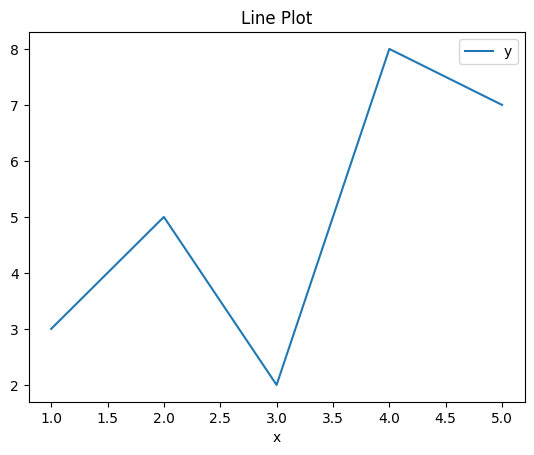

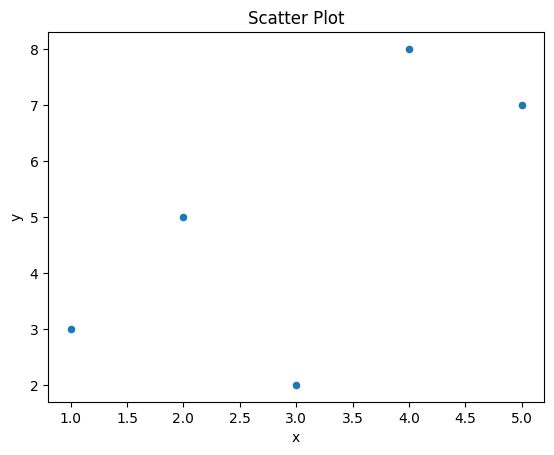

In [14]:
import matplotlib.pyplot as plt

df_plot = pd.DataFrame({
    'x': [1, 2, 3, 4, 5],
    'y': [3, 5, 2, 8, 7]
})

# Line plot
df_plot.plot(x='x', y='y', kind='line', title='Line Plot')
plt.show()

# Scatter plot
df_plot.plot.scatter(x='x', y='y', title='Scatter Plot')
plt.show()


## DataFrame & Series Info

You can retrieve metadata and info about a DataFrame or Series: shape, columns, index, dtypes, and null counts.


In [15]:
print("df_plot info:")
display(df_plot.info())

print("\nDataFrame attributes:")
print("Shape:", df_plot.shape)
print("Columns:", df_plot.columns)
print("Index:", df_plot.index)
print("\nDataFrame dtypes:")
display(df_plot.dtypes)

print("\nDescriptive statistics:")
display(df_plot.describe())

df_plot info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   x       5 non-null      int64
 1   y       5 non-null      int64
dtypes: int64(2)
memory usage: 212.0 bytes


None


DataFrame attributes:
Shape: (5, 2)
Columns: Index(['x', 'y'], dtype='object')
Index: RangeIndex(start=0, stop=5, step=1)

DataFrame dtypes:


x    int64
y    int64
dtype: object


Descriptive statistics:


,x,y
count,5.000000,5.00000
mean,3.000000,5.00000
std,1.581139,2.54951
min,1.000000,2.00000
25%,2.000000,3.00000
50%,3.000000,5.00000
75%,4.000000,7.00000
max,5.000000,8.00000


## Applying Functions

Use `df.apply()` to apply a function column-wise or row-wise, and `df.applymap()` for element-wise operations on an entire DataFrame. `Series.apply()` is element-wise by default.


In [16]:
print("df_stats")
display(df_stats)

# Apply a function to each column
print("Applying sum to each column:")
display(df_stats[['Col1', 'Col2']].apply(sum))

# Apply a function to each element
df_applied = df_stats.applymap(lambda x: x * 2)
print("\nApplying lambda x: x * 2 to each element:")
display(df_applied)

# For a single column (Series)
df_stats_col1_applied = df_stats['Col1'].apply(lambda x: x + 10)
print("\nAdding 10 to each element in Col1:")
display(df_stats_col1_applied)

# Apply function to two columns row-wise
temp_df = df_stats.copy() # copyinf DataFrame
temp_df['row_sums'] = temp_df.apply(lambda x: x['Col1'] + x['Col2'], axis=1)
print("\nSum of Col1 and Col2:")
display(temp_df)

df_stats


,Col1,Col2,Col3,Category,Status
0,74,65,92,A,Active
1,96,70,76,B,Inactive
2,63,68,83,A,Active
3,35,85,75,C,Active
4,56,11,42,B,Inactive


Applying sum to each column:


Col1    324
Col2    299
dtype: int64


Applying lambda x: x * 2 to each element:


/var/folders/wj/pbgm2qxx6vbfvq55xm8k42jh0000gn/T/ipykernel_43554/389234560.py:9: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_applied = df_stats.applymap(lambda x: x * 2)


,Col1,Col2,Col3,Category,Status
0,148,130,184,AA,ActiveActive
1,192,140,152,BB,InactiveInactive
2,126,136,166,AA,ActiveActive
3,70,170,150,CC,ActiveActive
4,112,22,84,BB,InactiveInactive



Adding 10 to each element in Col1:


0     84
1    106
2     73
3     45
4     66
Name: Col1, dtype: int64


Sum of Col1 and Col2:


,Col1,Col2,Col3,Category,Status,row_sums
0,74,65,92,A,Active,139
1,96,70,76,B,Inactive,166
2,63,68,83,A,Active,131
3,35,85,75,C,Active,120
4,56,11,42,B,Inactive,67


## Data Alignment

When performing operations on two Series or DataFrames with different indexes, pandas aligns the data based on labels by default. Missing labels become `NaN`. You can use fill parameters to handle this.


In [17]:
s1 = pd.Series([1, 2, 3], index=['a', 'b', 'c'])
s2 = pd.Series([4, 5, 6], index=['b', 'c', 'd'])

print("s1:")
display(s1)
print("\ns2:")
display(s2)

# Addition auto-aligns on index
s_sum = s1 + s2
print("\nAuto-aligned sum:")
display(s_sum)

# Fill missing with 0 while adding
s_sum_fill = s1.add(s2, fill_value=0)
print("\nSum with fill_value=0:")
display(s_sum_fill)

s1:


a    1
b    2
c    3
dtype: int64


s2:


b    4
c    5
d    6
dtype: int64


Auto-aligned sum:


a    NaN
b    6.0
c    8.0
d    NaN
dtype: float64


Sum with fill_value=0:


a    1.0
b    6.0
c    8.0
d    6.0
dtype: float64

## I/O: Reading & Writing Data

You can read data from various formats (CSV, Excel, SQL, etc.) and write DataFrames out similarly.


In [ ]:
# NOTE: Below lines are examples. They require actual files or database connections to run successfully.

# Reading a CSV
# df_read_csv = pd.read_csv("my_data.csv")

# Writing to a CSV
# df_read_csv.to_csv("my_output.csv", index=False)

# Reading an Excel file
# df_excel = pd.read_excel("my_data.xlsx", sheet_name="Sheet1")

# Writing to Excel
# df_excel.to_excel("my_new_excel.xlsx", index=False)

# SQL example (requires a real engine and table)
# from sqlalchemy import create_engine
# engine = create_engine("sqlite:///my_database.db")
# df_from_sql = pd.read_sql("SELECT * FROM my_table", engine)
# df_from_sql.to_sql("my_new_table", engine, if_exists="replace", index=False)


## Method Chaining

Method chaining involves writing multiple pandas operations in a single expression by "chaining" them with dots (`.`). This often improves readability and can reduce the need for intermediate variables.


In [18]:
df_chain = pd.DataFrame({
    'A': [1, 2, 3, 4],
    'B': [5, 6, 7, 8]
})

# Example of method chaining: melt, rename, query
df_chain_melted = (
    df_chain
    .melt(var_name='Variable', value_name='Value')
    .rename(columns={'Variable': 'var', 'Value': 'val'})
    .query('val > 3')
)
display(df_chain_melted)

,var,val
3,A,4
4,B,5
5,B,6
6,B,7
7,B,8


## Sampling, `nlargest`, and `nsmallest`

- **df.sample(n=... or frac=...)**: Randomly sample a certain number or fraction of rows.  
- **df.nlargest(n, 'column')**: Select the top *n* rows based on a column value, sorted descending.  
- **df.nsmallest(n, 'column')**: Select the bottom *n* rows based on a column value, sorted ascending.


In [19]:
df_sample = pd.DataFrame({'ColA': [5, 2, 9, 1, 7, 3]})
print("Original Data:")
display(df_sample)

# Random sample of 3 rows
sampled = df_sample.sample(n=3)
print("\nRandom sample of 3 rows:")
display(sampled)

# 2 largest values in ColA
largest_two = df_sample.nlargest(2, 'ColA')
print("\n2 largest in ColA:")
display(largest_two)

# 2 smallest values in ColA
smallest_two = df_sample.nsmallest(2, 'ColA')
print("\n2 smallest in ColA:")
display(smallest_two)

Original Data:


,ColA
0,5
1,2
2,9
3,1
4,7
5,3



Random sample of 3 rows:


,ColA
3,1
0,5
5,3



2 largest in ColA:


,ColA
2,9
4,7



2 smallest in ColA:


,ColA
3,1
1,2


## Drop Duplicates

- **df.drop_duplicates()**: Removes duplicate rows (or specified subset of columns).
- By default, it keeps the first occurrence and drops the rest. You can change this behavior with `keep='last'` or `keep=False`.


In [20]:
df_dup = pd.DataFrame({
    'X': [1, 1, 2, 2, 3],
    'Y': [10, 10, 20, 30, 30]
})
print("Original Data:")
display(df_dup)

df_no_dup = df_dup.drop_duplicates()
print("\nAfter drop_duplicates:")
display(df_no_dup)

Original Data:


,X,Y
0,1,10
1,1,10
2,2,20
3,2,30
4,3,30



After drop_duplicates:


,X,Y
0,1,10
2,2,20
3,2,30
4,3,30


## `value_counts` and Counting Uniques

- **Series.value_counts()**: Shows unique values in a Series and their frequency counts.  
- **Series.nunique()**: Counts the number of unique values in the Series.


In [21]:
df_counts = pd.Series(['apple', 'banana', 'apple', 'orange', 'banana'])
print("Original Series:")
display(df_counts)

print("\nValue counts:")
display(df_counts.value_counts())
print("\nNumber of unique values:")
display(df_counts.nunique())

Original Series:


0     apple
1    banana
2     apple
3    orange
4    banana
dtype: object


Value counts:


apple     2
banana    2
orange    1
Name: count, dtype: int64


Number of unique values:


3

## Regex Filtering

**df.filter(regex=...)**: Allows selecting columns that match a certain regular expression pattern.  
Useful when you have many columns sharing naming patterns.


In [22]:
df_filter = pd.DataFrame({
    'width_cm': [10, 15, 20],
    'height_cm': [5, 8, 12],
    'depth_m': [0.5, 0.8, 1.2]
})

# Filter columns that contain '_cm'
cm_cols = df_filter.filter(regex='_cm$')
print("Original DataFrame:")
display(df_filter)
print("\nColumns that end with '_cm':")
display(cm_cols)

Original DataFrame:


,width_cm,height_cm,depth_m
0,10,5,0.5
1,15,8,0.8
2,20,12,1.2



Columns that end with '_cm':


,width_cm,height_cm
0,10,5
1,15,8
2,20,12


## Using `df.query(...)`

`df.query(expr)` uses a string expression to filter rows in a DataFrame.  
Column names must be valid Python identifiers (letters, numbers, underscores, no spaces) or else be backticked (e.g., \`my column\`).


In [23]:
df_query = pd.DataFrame({
    'col1': [5, 10, 15],
    'col2': [2, 4, 6]
})
print("Original Data:")
display(df_query)

# Filter rows where col1 > 5 AND col2 < 6
filtered_query = df_query.query("col1 > 5 and col2 < 6")
print("\nFiltered via query:")
display(filtered_query)

Original Data:


,col1,col2
0,5,2
1,10,4
2,15,6



Filtered via query:


,col1,col2
1,10,4


## pivot vs pivot_table

- **pivot**: Reshapes a DataFrame without performing an aggregation. It requires that each index/column pair is unique.  
- **pivot_table**: Allows grouping and aggregation when you have duplicate indices/columns.


In [24]:
df_pivot_example = pd.DataFrame({
    'month': ['Jan', 'Jan', 'Feb', 'Feb'],
    'category': ['A', 'B', 'A', 'B'],
    'value': [10, 20, 30, 40]
})

print("Original DataFrame:")
display(df_pivot_example)

# pivot will fail if there are duplicate entries for month & category
# pivot_table can aggregate duplicates:
df_pivoted_tbl = df_pivot_example.pivot_table(
    index='month',
    columns='category',
    values='value',
    aggfunc='sum'
)
print("\nPivot Table with aggregation:")
display(df_pivoted_tbl)

Original DataFrame:


,month,category,value
0,Jan,A,10
1,Jan,B,20
2,Feb,A,30
3,Feb,B,40



Pivot Table with aggregation:


category,A,B
month,,
Feb,30,40
Jan,10,20


## shift, rank, and Cumulative Operations

- **shift**: Moves index by specified periods, introducing NaNs for missing positions.  
- **rank**: Assigns numeric rank to each entry in a Series (with optional tie-breaking methods).  
- **cumsum, cummax, cummin, cumprod**: Cumulative sums, maxima, minima, and products over rows or columns.


In [25]:
df_cum = pd.DataFrame({'vals': [100, 200, 200, 300]})
print("Original Data:")
display(df_cum)

# rank with 'dense' method
df_cum['rank'] = df_cum['vals'].rank(method='dense')
print("\nRank (dense) on 'vals':")
display(df_cum)

# shift by 1
df_cum['shifted_vals'] = df_cum['vals'].shift(1)
print("\nAfter shifting 'vals' by 1:")
display(df_cum)

# cumsum
df_cum['cumulative_sum'] = df_cum['vals'].cumsum()
print("\nCumulative sum of 'vals':")
display(df_cum)

Original Data:


,vals
0,100
1,200
2,200
3,300



Rank (dense) on 'vals':


,vals,rank
0,100,1.0
1,200,2.0
2,200,2.0
3,300,3.0



After shifting 'vals' by 1:


,vals,rank,shifted_vals
0,100,1.0,NaN
1,200,2.0,100.0
2,200,2.0,200.0
3,300,3.0,200.0



Cumulative sum of 'vals':


,vals,rank,shifted_vals,cumulative_sum
0,100,1.0,NaN,100
1,200,2.0,100.0,300
2,200,2.0,200.0,500
3,300,3.0,200.0,800
